<a href="https://colab.research.google.com/github/Vidya-1436/FMML_project_and_labs/blob/main/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
RS = 20150101
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



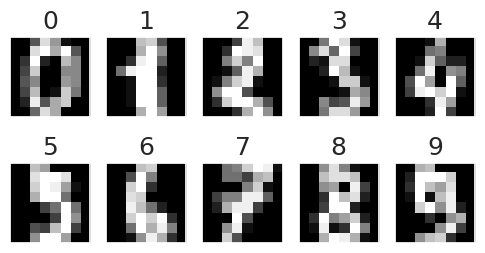

In [5]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [6]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [7]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

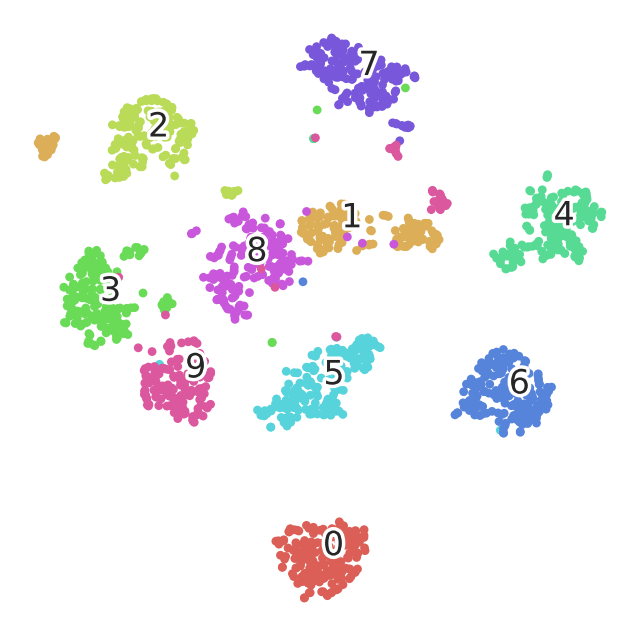

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780af370dbd0>)

In [8]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

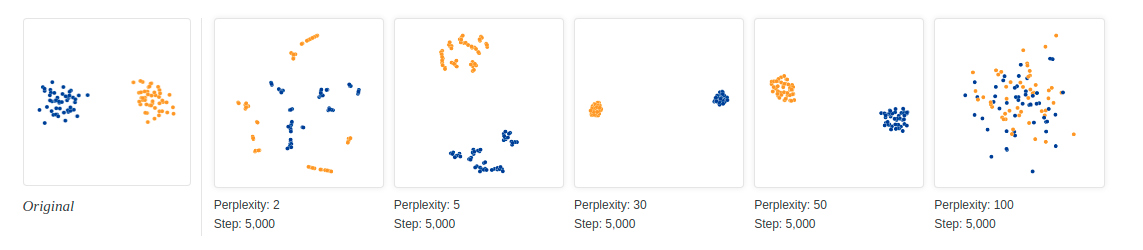



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

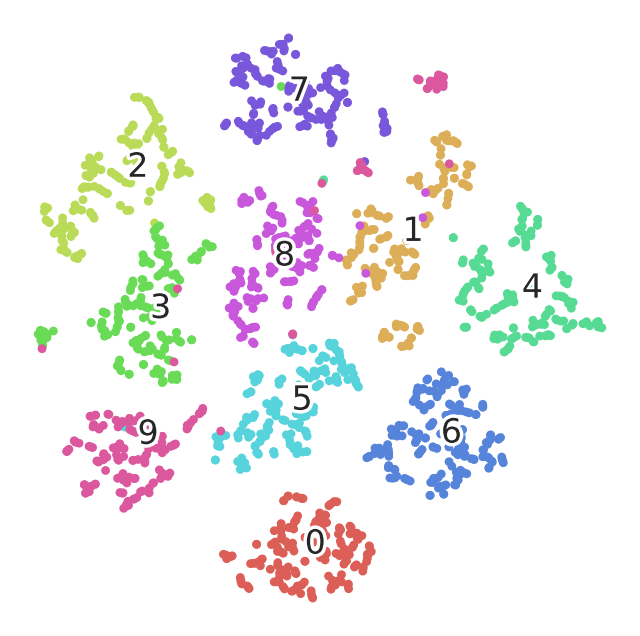

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780abac9cee0>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)



---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

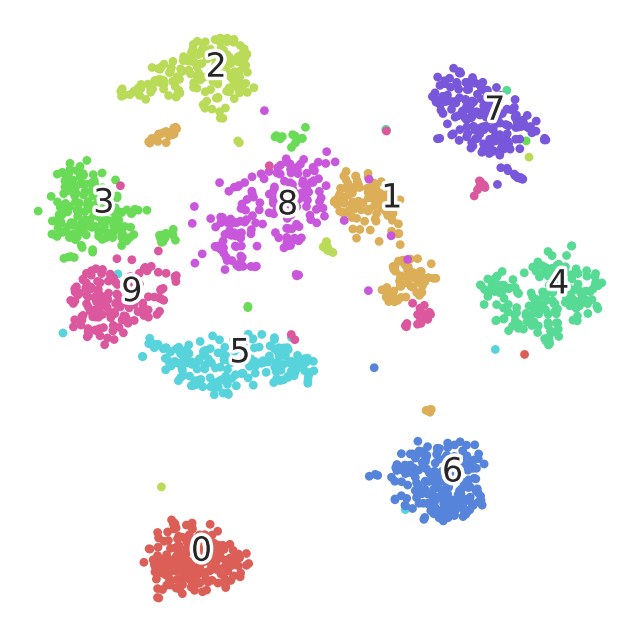

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780aba3cf520>)

In [10]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

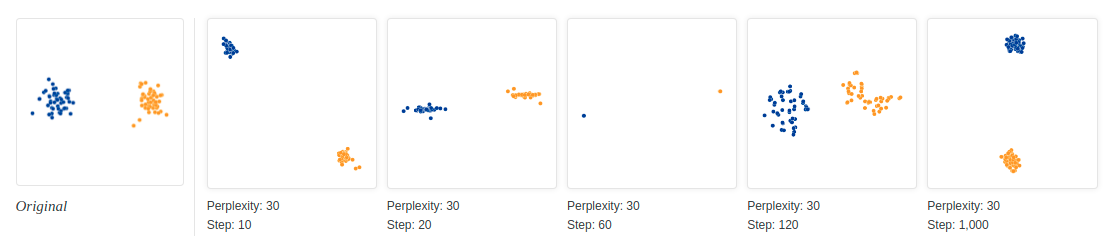

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


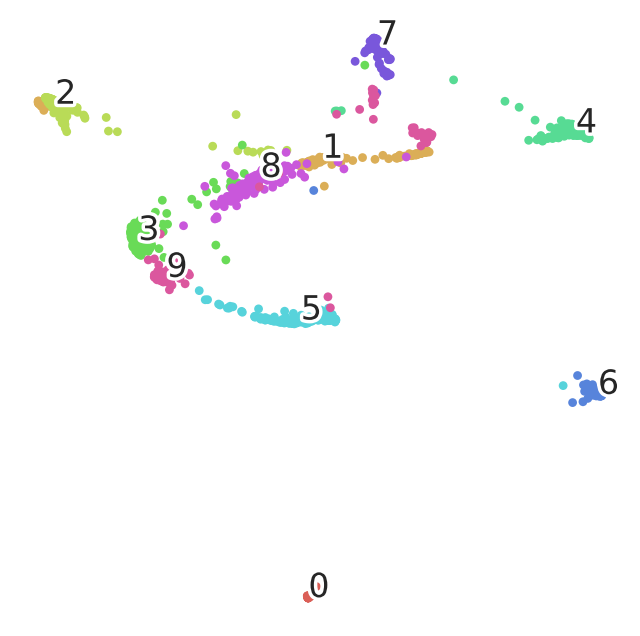

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780aba0b65c0>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


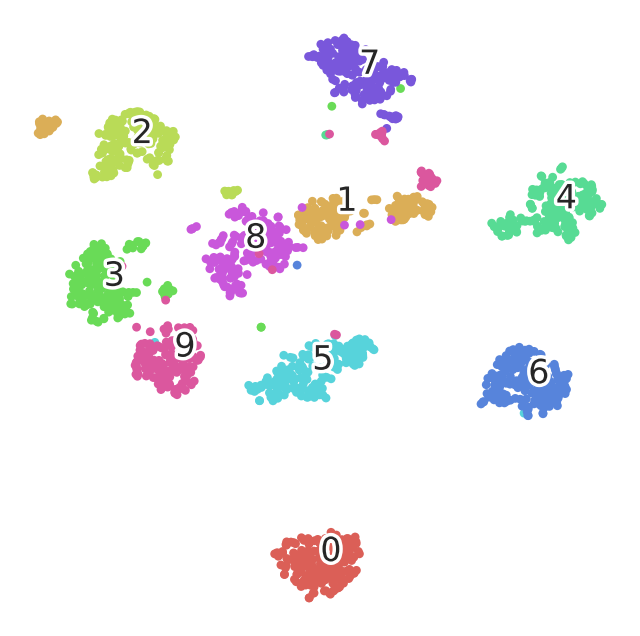

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780ab44ad270>)

In [12]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

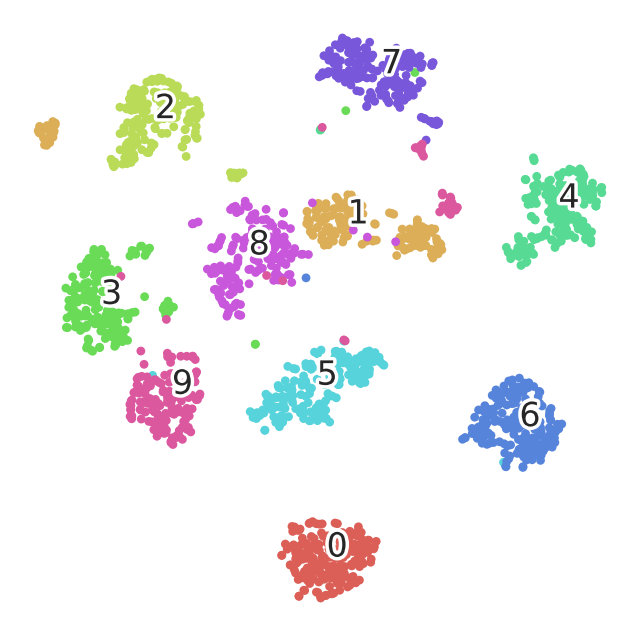

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780ab4369450>)

In [13]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


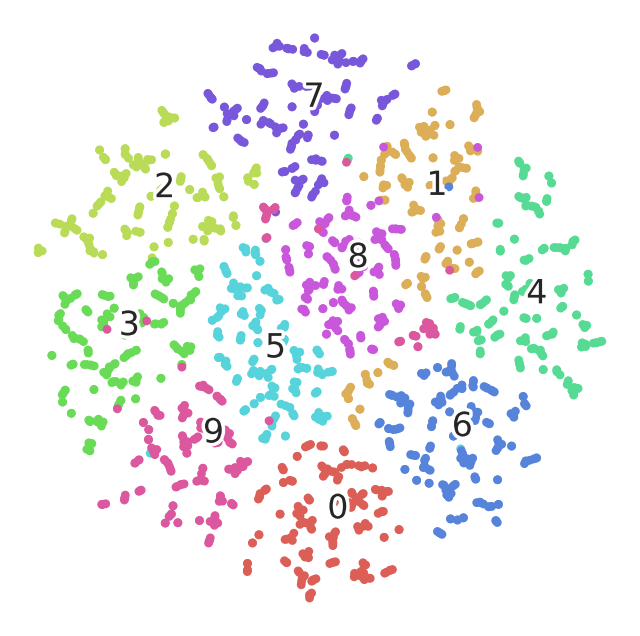

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x780ab4212800>)

In [15]:


perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"



digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?



Differences Between PCA and t-SNE
1. Linear vs. Non-Linear
PCA (Principal Component Analysis): Linear algorithm. It finds new axes (principal components) by projecting the data along directions of maximum variance.
t-SNE (t-Distributed Stochastic Neighbor Embedding): Non-linear algorithm. It models local relationships between data points using probabilistic similarity and reduces dimensionality while preserving those local structures.
2. Non-Linearity and Its Benefits
t-SNE's non-linearity allows it to capture complex, non-linear relationships that PCA would miss. It excels at handling datasets with clusters or manifolds, where local structures are more meaningful than global variance patterns.
3. Preserving Distances
PCA: Preserves global structure by maintaining large pairwise distances. Points far apart in high dimensions remain far apart in lower dimensions.
t-SNE: Focuses on preserving local neighborhoods, which means nearby points in high-dimensional space stay close, while it may sacrifice global structure. Points far apart might be represented closer, leading to clear clustering.
4. Computational Expense
PCA: Computationally efficient, with a complexity of O(n * d^2), where
𝑛
n is the number of points and
𝑑
d is the dimensionality. It can handle large datasets quickly.
t-SNE: Computationally more expensive with a complexity of O(n^2) due to pairwise distance calculations. The Barnes-Hut approximation reduces this to O(n * \log(n)), but it still becomes slow with large datasets.

2.How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?



Computational Complexity & Runtime of t-SNE
Scaling with dataset size: The runtime scales quadratically with dataset size without optimization, making it slow for large datasets.
Scaling with dimensionality: t-SNE's runtime is less sensitive to input dimensionality because it reduces it early, but high dimensions can make initial distance calculations slower.
Approximate algorithms (like Barnes-Hut t-SNE) make t-SNE feasible for datasets in the range of tens of thousands of points, but for larger datasets, other methods like UMAP or PCA are preferred.


3.What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


Limitations and Potential Pitfalls of t-SNE
Loss of Global Structure:
While t-SNE excels at preserving local neighborhoods, it distorts global distances, so relative positions between clusters may not be meaningful.

Computational Cost:
It can be slow and memory-intensive for large datasets, requiring optimization techniques or dimensionality reduction (like PCA) beforehand.

Random Initialization Sensitivity:
Results can vary based on initial conditions or random seeds, making reproducibility an issue unless parameters are carefully controlled.

Parameter Sensitivity:
t-SNE requires careful tuning of parameters like perplexity and learning rate, which significantly affect the visualization. Incorrect values may lead to misleading results.

Overemphasis on Clusters:
t-SNE tends to exaggerate clusters, even when they might not be as distinct in the original high-dimensional space, potentially leading to false interpretations.

These differences and pitfalls should be considered when choosing between PCA and t-SNE for a particular task. For example, PCA is often a good preprocessing step for t-SNE on large, high-dimensional datasets.